<h1 style = "font-size:3rem;color:orange">Extracting Frequency-Domain Audio Features</h1>

In [5]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa                  
import librosa.display 
import IPython.display as ipd
import scipy

In [6]:
# import audio to analyse
data, sr = librosa.load('../samples/Trumpet.wav')

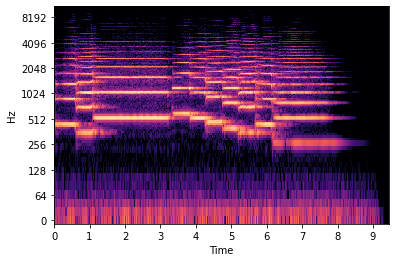

In [65]:
# get spectrogram
frame_size = 1048
hop_size = 512
STFT = librosa.stft(data, n_fft = frame_size, hop_length = hop_size)
STFT_db = librosa.amplitude_to_db(abs(STFT), ref=np.max)
img = librosa.display.specshow(STFT_db,
                                       y_axis='log',
                                       x_axis='time', 
                                       )

<h1 style = "font-size:3rem;color:orange">Band Energy Ratio</h1>

BER can be used to compare energy in different frequency bands (e.g. speech / speech discrimination or music genre classification)

\begin{equation}
    BER_t = \frac{\sum_{n=1}^{F-1}m_t(n)^2}{\sum_{n=F}^{N}m_t(n)^2},
\end{equation}
with split frequency $F$ (usually 2000 Hz).

In [32]:
def get_split_frequency_bin(STFT, split_frequency_in_Hz, sample_rate):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / STFT.shape[0]  
    split_frequency_bin = np.floor(split_frequency_in_Hz / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [38]:
split_frequency_bin = get_split_frequency_bin(STFT, 2000, sr)
STFT.shape[1]

407

In [87]:
def get_band_energy_ratio(STFT, split_frequency_in_Hz, sample_rate):
    split_frequency_in_Hz = get_split_frequency_bin(STFT, split_frequency_in_Hz, sample_rate)
    
    # power spectrogram
    power_spec = np.abs(STFT) ** 2
    power_spec = power_spec.T
    
    BER = []
    
    for frequencies_in_frame in power_spec:
        sum_power_low_bins = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_bins = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_curr_frame = sum_power_low_bins / sum_power_high_bins
        BER.append(ber_curr_frame)
        
    return np.array(BER)

C:\Users\helme\AppData\Local\Temp\ipykernel_22356\3176819922.py:13: RuntimeWarning: invalid value encountered in float_scalars
  ber_curr_frame = sum_power_low_bins / sum_power_high_bins


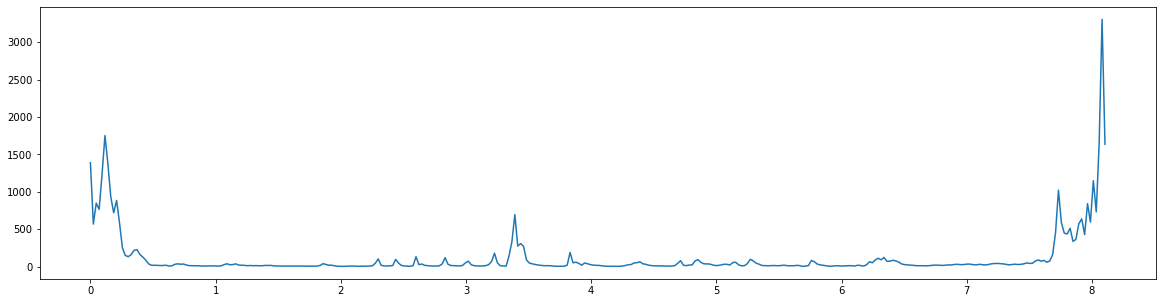

In [97]:
BER = get_band_energy_ratio(STFT, 2000, sr)

t = librosa.frames_to_time(range(0,len(BER)), hop_length=hop_size)

plt.figure(figsize=(20, 5))
plt.plot(t[0:350],BER[0:350])


<h1 style = "font-size:3rem;color:orange">Spectral Centroid</h1>

Center of gravity of magnitude spectrum, can be used to measure 'brightness' of sound
\begin{equation}
    SC_t = \frac{\sum_{n=1}^{N}m_t(n) \cdot n }{\sum_{n=1}^{N}m_t(n)},
\end{equation}

with frequency bin $n$ and frame $t$.


In [ ]:
def get_spectral_centroid(STFT):
    SC = []
    STFT_T = STFT.T
    
    for frequency_bin in STFT_T:
        SC[frequency_bin] = frequency_bin

<h1 style = "font-size:3rem;color:orange">Band Width</h1>

Weighted mean of the distances of frequency bands from spectral centroid
\begin{equation}
    BW_t = \frac{\sum_{n=1}^{N} |n - SC_t | \cdot m_t(n)}{\sum_{n=1}^{N}m_t(n)},
\end{equation}

with frequency bin $n$ and frame $t$.